In [146]:
import pandas as pd
from datetime import timedelta
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [147]:
#function to convert strings to dates :)
def string_to_datetime(string):
    result = datetime.strptime(string, "%Y-%m-%d")       
    return result

In [148]:
lyrics_data = pd.read_csv('BBH100_Complete_Kpop.csv', converters={'Chart date[16]':string_to_datetime})
lyrics_data.rename(columns={'Chart date[16]': 'chart_date', 
                            'Artist': 'artist',
                            'Song/Album Title': 'song_title',
                            'Original Lyrics Text': 'original_lyrics',
                            'Translated Lyrics Text': 'translated_lyrics',
                            'Peak position': 'peak_position',
                            'Weeks on Chart': 'chart_weeks'}, inplace=True)

##process text 
#remove romanized lyrics that are in some genius pages
lyrics_data["original_lyrics"] = [lyrics.split("Romanization")[0] for lyrics in lyrics_data["original_lyrics"]]

#get rid of bracketed sections like verse indicators
lyrics_data["original_lyrics"] = lyrics_data["original_lyrics"].str.replace(r"(\[.*\])", "")
lyrics_data["translated_lyrics"] = lyrics_data["translated_lyrics"].str.replace(r"(\[.*\])", "")

#standardize peak positions (remove parentheticals) + remove trailing whitespace
lyrics_data["peak_position"] = lyrics_data["peak_position"].str.replace(r"(\(.*\))", "")
lyrics_data["peak_position"] = lyrics_data["peak_position"].str.strip()

#delete trailing whitespace
lyrics_data["original_lyrics"] = lyrics_data["original_lyrics"].str.strip()
lyrics_data["translated_lyrics"] = lyrics_data["translated_lyrics"].str.strip()

#clean spacing: replace all add space before llinebreaks (so theyre counted separately)
lyrics_data["translated_lyrics"] = lyrics_data["translated_lyrics"].str.replace(r"(\n+)", " \n")
lyrics_data["original_lyrics"] = lyrics_data["original_lyrics"].str.replace(r"(\n+)", " \n")


#only roman characters and white space andd punctuation
lyrics_data["english_lyrics"] = lyrics_data["original_lyrics"].str.replace(r"([^a-z | A-Z | \s | \, | \' | \? | \! | \. | \- ])", " ")
#lyrics_data["english_lyrics"] = lyrics_data["english_lyrics"].str.replace(r"(\s+)", " ") #restandardize whitespace
lyrics_data["english_lyrics"] = lyrics_data["english_lyrics"].str.replace(r"(\s[, | \' | \? | \! | \. | \-]+)", " ")  #delete hanging punctuation

##count number of english lyrics and total lyrics
lyrics_data['english_count'] = [len(lyr.split(" ")) for lyr in lyrics_data['english_lyrics']]
lyrics_data['total_count'] = [len(lyr.split(" ")) for lyr in lyrics_data['original_lyrics']]

#pull out first number from chart_weeks
lyrics_data["chart_weeks"] = lyrics_data["chart_weeks"].str.extract(r"(\d{1})") 
lyrics_data['last_chart_date'] = [d for d in lyrics_data['chart_date']]

#add columns for sentiment polarity for both translated and english lyrics
lyrics_data['translated_sentiment'] = [0.0 for i in lyrics_data['artist']]
lyrics_data['english_sentiment'] = [0.0 for i in lyrics_data['artist']]

lyrics_data

,Unnamed: 0,chart_date,artist,song_title,Original URL,original_lyrics,English Translation URL,translated_lyrics,peak_position,chart_weeks,english_lyrics,english_count,total_count,last_chart_date,translated_sentiment,english_sentiment
0,0,2009-10-31,Wonder Girls,Nobody (English release),https://genius.com/Wonder-girls-nobody-english...,You know I still love you baby \nAnd it will n...,https://genius.com/Wonder-girls-nobody-english...,You know I still love you baby \nAnd it will n...,76,1,You know I still love you baby \nAnd it will n...,454,453,2009-10-31,0.0,0.0
1,1,2012-09-22,Psy,Gangnam Style,https://genius.com/Psy-gangnam-style-lyrics,Hangul \n오빤 강남 스타일 \n강남 스타일 \n낮에는 따사로운 인간적인 여자...,https://genius.com/Genius-english-translations...,Oppa Gangnam Style \nGangnam style \nWarm huma...,2,3,Hangul Hey Hey Hey Hey ...,97,271,2012-09-22,0.0,0.0
2,2,2013-04-27,Psy,Gentleman,https://genius.com/Psy-gentleman-lyrics,알랑가몰라 왜 화끈해야 하는건지 \n알랑가몰라 왜 말끔해야 하는건지 \n알랑가몰라 ...,https://lyricstranslate.com/en/gentleman-gentl...,I don’t know if you know \nwhy it needs to be ...,5,1,We like \nWe-we-we like party \nDa...,155,188,2013-04-27,0.0,0.0
3,3,2014-06-28,Psy feat. Snoop Dogg,Hangover,https://genius.com/Psy-hangover-lyrics,"Hangover, hangover, hangover, hangover-over-ov...",https://colorcodedlyrics.com/2014/06/psy-ssai-...,"Hangover, hangover, hangover, hangover-over-ov...",26,1,"Hangover, hangover, hangover, hangover-over-ov...",864,895,2014-06-28,0.0,0.0
4,4,2015-12-19,Psy feat. CL,Daddy,https://genius.com/Psy-daddy-lyrics,"I got it from my daddy \nDaddy \nI feel nice, ...",https://lyricstranslate.com/en/daddy-daddy.html-1,"I got it from my daddy \nDaddy \nI feel nice, ...",97,1,"I got it from my daddy \nDaddy \nI feel nice, ...",400,468,2015-12-19,0.0,0.0
5,5,2016-10-22,CL,Lifted,https://genius.com/Cl-lifted-lyrics,"Hey, you, get off my cloud \nYou don't know me...",https://genius.com/Cl-lifted-lyrics,"Hey, you, get off my cloud \nYou don't know me...",94,1,"Hey, you, get off my cloud \nYou don't know me...",395,401,2016-10-22,0.0,0.0
6,6,2017-10-07,BTS,DNA,https://genius.com/Bts-dna-lyrics,"첫눈에 널 알아보게 됐어 (Hmm-mm) \n서롤 불러왔던 것처럼 (Ooh, ooh...",https://genius.com/Genius-english-translations...,"At first sight, I could recognize you \nAs if ...",67,4,"Hmm-mm Ooh, ooh-ooh-ooh-ooh DNA Hmm-mm Ooh...",110,266,2017-10-07,0.0,0.0
7,7,2017-12-16,BTS feat. Desiigner,MIC Drop (Steve Aoki remix),https://genius.com/Bts-mic-drop-steve-aoki-rem...,"Git, git, brrra, git, git \n(Damn, son, where'...",ANNOTATED,"Git, git, brrra, git, git \n(Damn, son, where'...",28,1,"Git, git, brrra, git, git Damn, son, where'd ...",590,647,2017-12-16,0.0,0.0
8,8,2018-06-02,BTS,Fake Love,https://genius.com/Bts-fake-love-lyrics,널 위해서라면 난 \n슬퍼도 기쁜 척 할 수가 있었어 \n널 위해서라면 난 \n아파...,https://genius.com/Genius-english-translations...,"For you, I could pretend like I was happy when...",10,6,"\nI'm so sick of this fake love, fake ...",248,408,2018-06-02,0.0,0.0
9,9,2018-06-30,Blackpink,Ddu-Du Ddu-Du,https://genius.com/Blackpink-ddu-du-ddu-du-lyrics,"BLACKPINK! \n(Ah yeah, ah yeah!) \nBLACKPINK! ...",https://genius.com/Genius-english-translations...,"BLACKPINK! \n(Ah yeah, ah yeah!) \nBLACKPINK! ...",55,1,"BLACKPINK! Ah yeah, ah yeah! \nBLACKPINK! Ah...",209,307,2018-06-30,0.0,0.0


In [149]:
##store best position if multiple are listed
for i, r in lyrics_data.iterrows():
    if len(r['peak_position'].split(' ')) > 1:
        ps = []
        for p in r['peak_position'].split(' '):
            try:
                ps.append(int(p))
            except: pass
        print(ps, min(ps))
        lyrics_data.at[i, 'peak_position'] = min(ps)

[95, 76] 76


In [150]:
from textblob import TextBlob

In [151]:
for i, r in lyrics_data.iterrows():
    print(r['song_title'])

    eng_blob = TextBlob(r['english_lyrics'])
    print('english', eng_blob.sentiment.polarity)
    lyrics_data.at[i, 'english_sentiment'] = eng_blob.sentiment.polarity

    trans_blob = TextBlob(r['translated_lyrics'])
    print('translated', trans_blob.sentiment.polarity)
    lyrics_data.at[i, 'translated_sentiment'] = trans_blob.sentiment.polarity
    

Nobody (English release)
english 5.153576582148497e-05
translated 5.153576582148497e-05
Gangnam Style
english 0.5
translated 0.3921874999999999
Gentleman
english 0.11999999999999993
translated 0.08669270833333328
Hangover
english -0.18954575517075511
translated -0.16963059163059158
Daddy
english 0.48333333333333334
translated 0.2841036414565826
Lifted
english -0.13373015873015875
translated -0.13373015873015875
DNA
english 0.5349999999999999
translated 0.15014880952380955
MIC Drop (Steve Aoki remix)
english -0.07285889785889788
translated -0.046976063152533776
Fake Love
english -0.07193877551020408
translated 0.046141041162227586
Ddu-Du Ddu-Du
english -0.2954036458333333
translated 0.13778582317073174
Idol
english 0.438425925925926
translated 0.4078088578088578
Kiss and Make Up
english -0.17391304347826084
translated -0.16296296296296292
Waste It on Me
english -0.008143939393939384
translated -0.008143939393939384
Kill This Love
english 0.268031746031746
translated 0.21606866002214836


(array([ 1.,  0.,  1.,  1.,  2., 13., 12.,  3.,  0.,  1.]),
 array([-0.7020423 , -0.58851912, -0.47499594, -0.36147277, -0.24794959,
        -0.13442641, -0.02090324,  0.09261994,  0.20614312,  0.31966629,
         0.43318947]),
 <BarContainer object of 10 artists>)

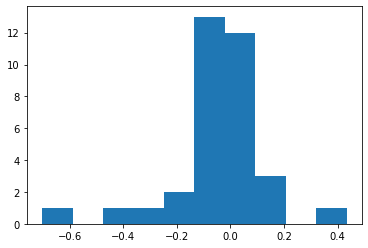

In [152]:
#exploratory viz of difference between translated and english sentiment polarity
plt.hist(lyrics_data['translated_sentiment'] - lyrics_data['english_sentiment'])

In [154]:
lyrics_data.to_csv('Sentiment_Processed_BBH100_Kpop.csv')

In [11]:
##experiment with using vader instead of textblob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [12]:
##test vader on documentation examples
## https://github.com/cjhutto/vaderSentiment#python-demo-and-code-examples
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

In [84]:
test_lyrics = list(lyrics_data.loc[lyrics_data['song_title'] == 'Fake Love']['translated_lyrics'])[0]
analyzer.polarity_scores(test_lyrics)

{'neg': 0.24, 'neu': 0.378, 'pos': 0.382, 'compound': 0.9995}

In [89]:
test_lyrics = list(lyrics_data.loc[lyrics_data['song_title'] == 'Kill This Love']['translated_lyrics'])[0]
analyzer.polarity_scores(test_lyrics)

{'neg': 0.228, 'neu': 0.455, 'pos': 0.317, 'compound': 0.9946}

In [86]:
test_lyrics = list(lyrics_data.loc[lyrics_data['song_title'] == 'Dis-ease']['translated_lyrics'])[0]
analyzer.polarity_scores(test_lyrics)

{'neg': 0.12, 'neu': 0.765, 'pos': 0.116, 'compound': -0.6514}

In [127]:
test_lyrics = list(lyrics_data.loc[lyrics_data['song_title'] == 'On']['translated_lyrics'])[0]
analyzer.polarity_scores(test_lyrics)

{'neg': 0.178, 'neu': 0.718, 'pos': 0.103, 'compound': -0.9944}

In [91]:
test_lyrics = list(lyrics_data.loc[lyrics_data['song_title'] == 'Kill This Love']['english_lyrics'])[0]
analyzer.polarity_scores(test_lyrics)

{'neg': 0.239, 'neu': 0.396, 'pos': 0.365, 'compound': 0.9914}

In [126]:
import re
test_lyrics = list(lyrics_data.loc[lyrics_data['song_title'] == 'On']['translated_lyrics'])[0]
test_tokens = re.findall('[A-Z][^A-Z]*', test_lyrics)
test_tokens = test_lyrics.split('\n')
scores = []
for t in test_tokens:
    print(t)
    scores.append(analyzer.polarity_scores(t)['compound'])
np.mean(scores)

I can't understand what people are sayin' 
Who and what do I need to follow 
With each step then again grows the shadow 
Where is this place I open my eyes to 
Maybe Seoul or New York or Paris 
I get up, unsteady on my feet (Yeah) 
(Look) Look at my feet, look down 
The shadow resembles me 
Is it the shadow that's shaking 
Or is it my feet that are trembling 
Of course I‘m not unafraid 
Of course it's not all okay 
But I know 
Awkwardly I flow 
I fly together with that black wind 
Hey na-na-na 
Gotta go insane to stay sane 
Hey na-na-na 
Throw myself whole into both worlds 
Hey na-na-na 
Can't hold me down 'cuz you know I'm a fighter 
Carried myself into this beautiful prison 
Find me and I'm gonna live with ya 
(Eh-oh) 
Bring it, bring the pain, on yeah 
(Eh-oh) 
Come on up, bring the pain, on yeah 
Rain be pourin' 
Sky keep fallin' 
Everyday oh na-na-na 
(Eh-oh) 
Bring it, bring the pain, on yeah 
Bring the pain 
It'll become my blood and flesh 
Bring the pain 
No fear, now that I kn

-0.04866631578947369

In [145]:
lyrics_data

,Unnamed: 0,chart_date,artist,song_title,Original URL,original_lyrics,English Translation URL,translated_lyrics,peak_position,chart_weeks,english_lyrics,english_count,total_count,last_chart_date,translated_sentiment,english_sentiment
0,0,2009-10-31,Wonder Girls,Nobody (English release),https://genius.com/Wonder-girls-nobody-english...,You know I still love you baby \nAnd it will n...,https://genius.com/Wonder-girls-nobody-english...,You know I still love you baby \nAnd it will n...,76,1,You know I still love you baby \nAnd it will n...,454,453,2009-10-31,0.000052,0.000052
1,1,2012-09-22,Psy,Gangnam Style,https://genius.com/Psy-gangnam-style-lyrics,Hangul \n오빤 강남 스타일 \n강남 스타일 \n낮에는 따사로운 인간적인 여자...,https://genius.com/Genius-english-translations...,Oppa Gangnam Style \nGangnam style \nWarm huma...,2,3,Hangul Hey Hey Hey Hey ...,97,271,2012-09-22,0.392187,0.500000
2,2,2013-04-27,Psy,Gentleman,https://genius.com/Psy-gentleman-lyrics,알랑가몰라 왜 화끈해야 하는건지 \n알랑가몰라 왜 말끔해야 하는건지 \n알랑가몰라 ...,https://lyricstranslate.com/en/gentleman-gentl...,I don’t know if you know \nwhy it needs to be ...,5,1,We like \nWe-we-we like party \nDa...,155,188,2013-04-27,0.086693,0.120000
3,3,2014-06-28,Psy feat. Snoop Dogg,Hangover,https://genius.com/Psy-hangover-lyrics,"Hangover, hangover, hangover, hangover-over-ov...",https://colorcodedlyrics.com/2014/06/psy-ssai-...,"Hangover, hangover, hangover, hangover-over-ov...",26,1,"Hangover, hangover, hangover, hangover-over-ov...",864,895,2014-06-28,-0.169631,-0.189546
4,4,2015-12-19,Psy feat. CL,Daddy,https://genius.com/Psy-daddy-lyrics,"I got it from my daddy \nDaddy \nI feel nice, ...",https://lyricstranslate.com/en/daddy-daddy.html-1,"I got it from my daddy \nDaddy \nI feel nice, ...",97,1,"I got it from my daddy \nDaddy \nI feel nice, ...",400,468,2015-12-19,0.284104,0.483333
5,5,2016-10-22,CL,Lifted,https://genius.com/Cl-lifted-lyrics,"Hey, you, get off my cloud \nYou don't know me...",https://genius.com/Cl-lifted-lyrics,"Hey, you, get off my cloud \nYou don't know me...",94,1,"Hey, you, get off my cloud \nYou don't know me...",395,401,2016-10-22,-0.133730,-0.133730
6,6,2017-10-07,BTS,DNA,https://genius.com/Bts-dna-lyrics,"첫눈에 널 알아보게 됐어 (Hmm-mm) \n서롤 불러왔던 것처럼 (Ooh, ooh...",https://genius.com/Genius-english-translations...,"At first sight, I could recognize you \nAs if ...",67,4,"Hmm-mm Ooh, ooh-ooh-ooh-ooh DNA Hmm-mm Ooh...",110,266,2017-10-07,0.150149,0.535000
7,7,2017-12-16,BTS feat. Desiigner,MIC Drop (Steve Aoki remix),https://genius.com/Bts-mic-drop-steve-aoki-rem...,"Git, git, brrra, git, git \n(Damn, son, where'...",ANNOTATED,"Git, git, brrra, git, git \n(Damn, son, where'...",28,1,"Git, git, brrra, git, git Damn, son, where'd ...",590,647,2017-12-16,-0.046976,-0.072859
8,8,2018-06-02,BTS,Fake Love,https://genius.com/Bts-fake-love-lyrics,널 위해서라면 난 \n슬퍼도 기쁜 척 할 수가 있었어 \n널 위해서라면 난 \n아파...,https://genius.com/Genius-english-translations...,"For you, I could pretend like I was happy when...",10,6,"\nI'm so sick of this fake love, fake ...",248,408,2018-06-02,0.046141,-0.071939
9,9,2018-06-30,Blackpink,Ddu-Du Ddu-Du,https://genius.com/Blackpink-ddu-du-ddu-du-lyrics,"BLACKPINK! \n(Ah yeah, ah yeah!) \nBLACKPINK! ...",https://genius.com/Genius-english-translations...,"BLACKPINK! \n(Ah yeah, ah yeah!) \nBLACKPINK! ...",55,1,"BLACKPINK! Ah yeah, ah yeah! \nBLACKPINK! Ah...",209,307,2018-06-30,0.137786,-0.295404
